In [257]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#EDA


In [258]:
import pandas as pd

df = pd.read_csv('/content/Supermarket.csv')


In [259]:
df.head()

,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France


In [260]:
df.shape

(8557, 8)

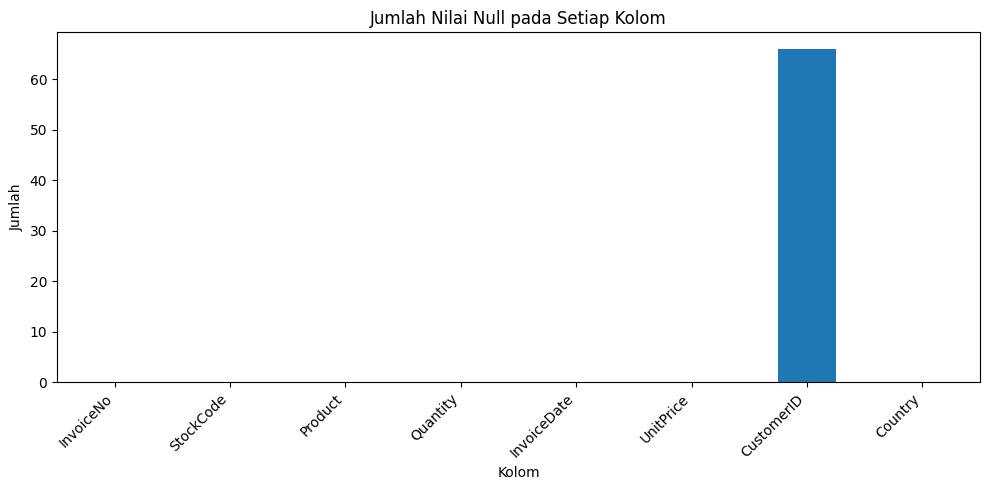

In [261]:
import matplotlib.pyplot as plt

missing_counts = df.isnull().sum()

plt.figure(figsize=(10, 5))
missing_counts.plot(kind='bar')

plt.title('Jumlah Nilai Null pada Setiap Kolom')
plt.xlabel('Kolom')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


/tmp/ipython-input-4026384646.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


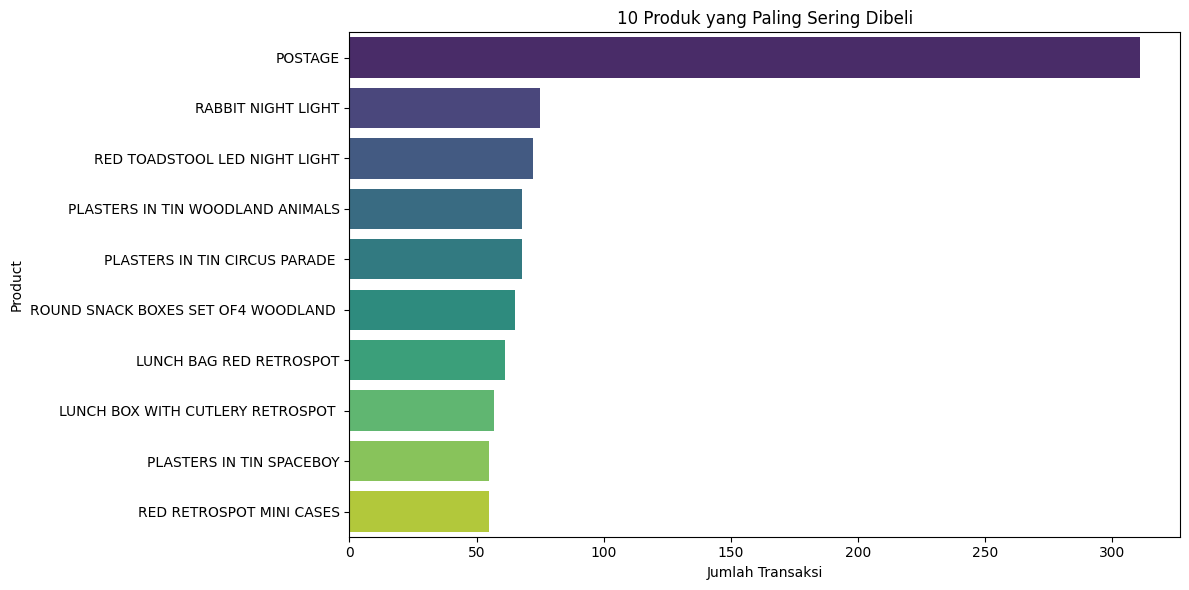

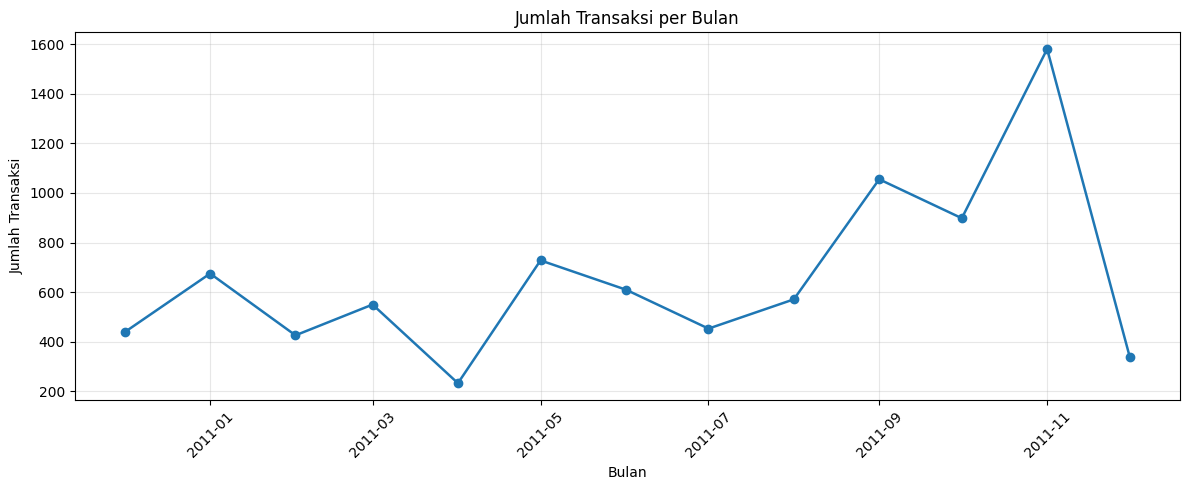

In [262]:
import seaborn as sns

# Konversi InvoiceDate ke datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df = df.dropna(subset=['InvoiceDate'])

# Histogram Frekuensi Produk Teratas
top_products = df['Product'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title("10 Produk yang Paling Sering Dibeli")
plt.xlabel("Jumlah Transaksi")
plt.tight_layout()
plt.show()

# Ekstrak Bulan dan Tahun untuk agregasi bulanan
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

# Jumlah transaksi per bulan
trx_per_month = df.groupby('InvoiceMonth').size()

# konversi ke datetime
trx_per_month.index = trx_per_month.index.to_timestamp()

plt.figure(figsize=(12,5))
plt.plot(trx_per_month.index, trx_per_month.values, marker='o', linewidth=1.8)

plt.title("Jumlah Transaksi per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [263]:
quantity_stats = {
    'Mean': df['Quantity'].mean(),
    'Mode': df['Quantity'].mode()[0],
    'Q1': df['Quantity'].quantile(0.25),
    'Median': df['Quantity'].quantile(0.50),
    'Q3': df['Quantity'].quantile(0.75)
}

quantity_stats


{'Mean': np.float64(12.91106696272058),
 'Mode': np.int64(12),
 'Q1': np.float64(5.0),
 'Median': np.float64(10.0),
 'Q3': np.float64(12.0)}

In [264]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Product,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object
InvoiceMonth,period[M]


#Pra-pemrosesan

In [265]:
df = df.dropna(subset=['CustomerID'])

In [266]:
df.shape

(8491, 9)

In [267]:
duplicate_rows = df.duplicated()
num_duplicates = duplicate_rows.sum()

print(f"Jumlah data duplikat: {num_duplicates}")


Jumlah data duplikat: 16


In [268]:
df[df.duplicated(keep=False)]

,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
1772,547194,22895,SET OF 2 TEA TOWELS APPLE AND PEARS,1,2011-03-21 12:42:00,2.95,12637.0,France,2011-03
1779,547194,22554,PLASTERS IN TIN WOODLAND ANIMALS,1,2011-03-21 12:42:00,1.65,12637.0,France,2011-03
1784,547194,22554,PLASTERS IN TIN WOODLAND ANIMALS,1,2011-03-21 12:42:00,1.65,12637.0,France,2011-03
1807,547194,22895,SET OF 2 TEA TOWELS APPLE AND PEARS,1,2011-03-21 12:42:00,2.95,12637.0,France,2011-03
2545,552826,82583,HOT BATHS METAL SIGN,4,2011-05-11 13:20:00,2.10,14277.0,France,2011-05
2550,552826,82583,HOT BATHS METAL SIGN,4,2011-05-11 13:20:00,2.10,14277.0,France,2011-05
5766,569332,22328,ROUND SNACK BOXES SET OF 4 FRUITS,1,2011-10-03 13:46:00,2.95,12637.0,France,2011-10
5772,569332,22553,PLASTERS IN TIN SKULLS,1,2011-10-03 13:46:00,1.65,12637.0,France,2011-10
5788,569332,23206,LUNCH BAG APPLE DESIGN,1,2011-10-03 13:46:00,1.65,12637.0,France,2011-10
5790,569332,22553,PLASTERS IN TIN SKULLS,1,2011-10-03 13:46:00,1.65,12637.0,France,2011-10


In [269]:
df = df.drop_duplicates()

In [270]:
df.shape

(8475, 9)

In [271]:
# Cek apakah ada nilai negatif di kolom Quantity dan UnitPrice
(df['Quantity'] < 0).any(), (df['UnitPrice'] < 0).any()


(np.True_, np.False_)

In [272]:
df = df[(df['Quantity'] > 0)]
df = df[(df['UnitPrice'] > 0)]

In [273]:
df.shape

(8326, 9)

In [274]:
# Total transaksi per item
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

#Transformasi Data

In [275]:
hasil_agregasi = df.groupby('Product').agg(
    keterlibatan=("InvoiceNo","nunique"),
    jumlah_riil=("Quantity","sum")
).reset_index().sort_values(by="keterlibatan",ascending=False)

hasil_agregasi


,Product,keterlibatan,jumlah_riil
964,POSTAGE,300,825
972,RABBIT NIGHT LIGHT,73,4000
1046,RED TOADSTOOL LED NIGHT LIGHT,70,1291
946,PLASTERS IN TIN WOODLAND ANIMALS,67,1143
941,PLASTERS IN TIN CIRCUS PARADE,66,1144
...,...,...,...
24,3 RAFFIA RIBBONS 50'S CHRISTMAS,1,10
22,3 HOOK HANGER MAGIC GARDEN,1,12
18,16 PIECE CUTLERY SET PANTRY DESIGN,1,2
17,15CM CHRISTMAS GLASS BALL 20 LIGHTS,1,8


In [276]:
hasil_agregasi.to_csv('hasil_agregasi.csv', index=False)

In [277]:
hasil_agregasi['keterlibatan'].median()

2.0

In [278]:
hasil_agregasi['jumlah_riil'].median()

24.0

In [279]:
agregasi = hasil_agregasi[(hasil_agregasi['keterlibatan'] > 2) & (hasil_agregasi['jumlah_riil'] > 24)]

In [280]:
agregasi

,Product,keterlibatan,jumlah_riil
964,POSTAGE,300,825
972,RABBIT NIGHT LIGHT,73,4000
1046,RED TOADSTOOL LED NIGHT LIGHT,70,1291
946,PLASTERS IN TIN WOODLAND ANIMALS,67,1143
941,PLASTERS IN TIN CIRCUS PARADE,66,1144
...,...,...,...
1531,WRAP POPPIES DESIGN,3,75
1528,WRAP I LOVE LONDON,3,100
28,36 DOILIES DOLLY GIRL,3,36
27,3 TRADITIONAl BISCUIT CUTTERS SET,3,36


In [281]:
agregasi.to_csv('agregasi.csv', index=False)

In [282]:
df = df.merge(agregasi[['Product', 'keterlibatan', 'jumlah_riil']], on='Product', how='left')
df = df.dropna(subset=['keterlibatan'])

In [283]:
df

,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,keterlibatan,jumlah_riil
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,2010-12,90.00,40.0,362.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,2010-12,90.00,37.0,316.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,2010-12,45.00,38.0,340.0
4,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France,2010-12,15.60,13.0,312.0
5,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583.0,France,2010-12,40.80,8.0,372.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8321,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12,10.20,8.0,132.0
8322,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12,12.60,19.0,200.0
8323,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,16.60,28.0,160.0
8324,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,16.60,12.0,118.0


In [284]:
df.to_csv('df_agregasi.csv', index=False)

#RFM

In [285]:
# Tanggal referensi = tanggal terakhir transaksi
max_date = df['InvoiceDate'].max()

# Fungsi untuk menghitung Recency
def recency_func(tanggal):
    return (max_date - tanggal.max()).days

# Hitung nilai RFM
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': recency_func,    # Recency
    'InvoiceNo': 'nunique',         # Frequency
    'TotalPrice': 'sum'             # Monetary
}).reset_index()

# Ganti nama kolom
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12413.0,66,3,652.10
1,12437.0,1,18,4413.42
2,12441.0,366,1,63.90
3,12488.0,9,3,1033.46
4,12489.0,335,1,266.28


In [286]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

#K-Means

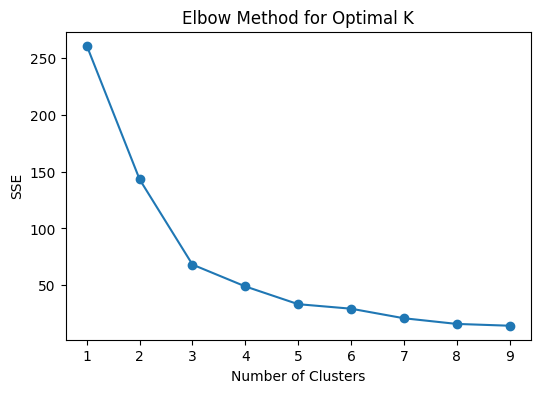

In [287]:
from sklearn.cluster import KMeans

sse = []  # sum of squared errors

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1, 10), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()


In [288]:
from sklearn.metrics import silhouette_score

sil_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(rfm_scaled)
    sil = silhouette_score(rfm_scaled, labels)
    sil_scores.append(sil)
    print("k =", k, " | Silhouette =", sil)

k = 2  | Silhouette = 0.6191411590543493
k = 3  | Silhouette = 0.5996039595308218
k = 4  | Silhouette = 0.49073670607217457
k = 5  | Silhouette = 0.5079267571304336
k = 6  | Silhouette = 0.3851873224568369
k = 7  | Silhouette = 0.39750345589212294
k = 8  | Silhouette = 0.42865431225847184
k = 9  | Silhouette = 0.4195142129025403


In [289]:
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [290]:
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'}).round(2)

print(cluster_summary)

         Recency  Frequency  Monetary  Count
Cluster                                     
0          42.82       3.68   1306.13     62
1          13.75      16.62  10523.47      8
2         297.29       1.06    196.37     17


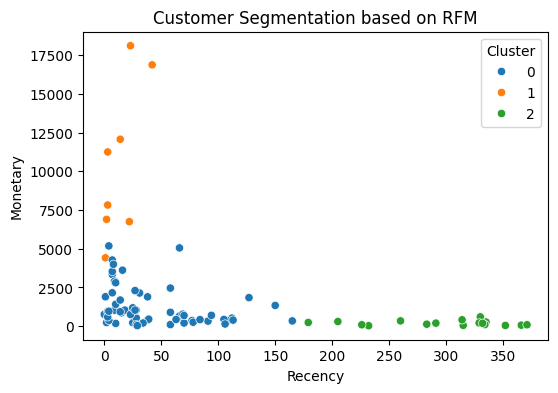

In [291]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='tab10')
plt.title('Customer Segmentation based on RFM')
plt.show()


In [292]:
df = df.merge(rfm[['CustomerID', 'Cluster']], on='CustomerID', how='left')

In [293]:
df

,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,keterlibatan,jumlah_riil,Cluster
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,2010-12,90.00,40.0,362.0,1
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,2010-12,90.00,37.0,316.0,1
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,2010-12,45.00,38.0,340.0,1
3,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France,2010-12,15.60,13.0,312.0,1
4,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583.0,France,2010-12,40.80,8.0,372.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12,10.20,8.0,132.0,0
6663,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12,12.60,19.0,200.0,0
6664,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,16.60,28.0,160.0,0
6665,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,16.60,12.0,118.0,0


In [294]:
df.to_csv('label cluster.csv', index=False)

#FP-Growth

In [295]:
# subset per cluster
cluster_0 = df[df['Cluster'] == 0]
cluster_1 = df[df['Cluster'] == 1]
cluster_2 = df[df['Cluster'] == 2]

In [296]:
# mengelompokkan item per transaksi
transactions_cluster0 = cluster_0.groupby('InvoiceNo')['Product'].apply(list)
transactions_cluster1 = cluster_1.groupby('InvoiceNo')['Product'].apply(list)
transactions_cluster2 = cluster_2.groupby('InvoiceNo')['Product'].apply(list)

In [297]:
transactions_cluster0.shape

(228,)

In [298]:
transactions_cluster1.shape

(133,)

In [299]:
transactions_cluster2.shape

(18,)

In [300]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

# cluster 0
te = TransactionEncoder()
te_ary = te.fit(transactions_cluster0).transform(transactions_cluster0)
df_cluster0_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# FP-Growth cluster 0
frequent_items_0 = fpgrowth(df_cluster0_encoded, min_support=0.06)
rules_0 = association_rules(frequent_items_0, metric="lift", min_threshold=1)

In [301]:
frequent_items_0.shape

(160, 2)

In [302]:
rules_0.shape

(272, 14)

In [303]:
rules_0.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(226),(339),0.100877,0.776316,0.078947,0.782609,1.008106,1.0,0.000635,1.028947,0.008943,0.098901,0.028133,0.442152
1,(339),(226),0.776316,0.100877,0.078947,0.101695,1.008106,1.0,0.000635,1.000910,0.035948,0.098901,0.000909,0.442152
2,(226),(236),0.100877,0.131579,0.070175,0.695652,5.286957,1.0,0.056902,2.853383,0.901829,0.432432,0.649539,0.614493
3,(236),(226),0.131579,0.100877,0.070175,0.533333,5.286957,1.0,0.056902,1.926692,0.933712,0.432432,0.480976,0.614493
4,(226),(231),0.100877,0.140351,0.065789,0.652174,4.646739,1.0,0.051631,2.471491,0.872846,0.375000,0.595386,0.560462


In [304]:
# Mengambil nama produk
product_map = df['Product'].to_dict()

def map_product_names(itemset):
    return [product_map.get(i, str(i)) for i in itemset]

rules_0['antecedents'] = rules_0['antecedents'].apply(map_product_names)
rules_0['consequents'] = rules_0['consequents'].apply(map_product_names)

rules_0 = rules_0[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

In [305]:
top10_rules0 = (
    rules_0.sort_values(by='lift', ascending=False).head(10)
)
top10_rules0

,antecedents,consequents,support,confidence,lift
234,[BIG DOUGHNUT FRIDGE MAGNETS],"[RED RETROSPOT MINI CASES, SET OF SALT AND PEP...",0.065789,0.625000,8.906250
231,"[RED RETROSPOT MINI CASES, SET OF SALT AND PEP...",[BIG DOUGHNUT FRIDGE MAGNETS],0.065789,0.937500,8.906250
263,[WOODLAND STICKERS],[COFFEE MUG CAT + BIRD DESIGN],0.096491,0.880000,8.723478
262,[COFFEE MUG CAT + BIRD DESIGN],[WOODLAND STICKERS],0.096491,0.956522,8.723478
266,[COFFEE MUG CAT + BIRD DESIGN],"[PACK OF 72 RETROSPOT CAKE CASES, WOODLAND ST...",0.061404,0.608696,8.673913
265,"[PACK OF 72 RETROSPOT CAKE CASES, WOODLAND ST...",[COFFEE MUG CAT + BIRD DESIGN],0.061404,0.875000,8.673913
267,[WOODLAND STICKERS],"[COFFEE MUG CAT + BIRD DESIGN, PACK OF 72 RETR...",0.061404,0.560000,8.512000
264,"[COFFEE MUG CAT + BIRD DESIGN, PACK OF 72 RETR...",[WOODLAND STICKERS],0.061404,0.933333,8.512000
230,"[RED RETROSPOT MINI CASES, BIG DOUGHNUT FRIDGE...",[SET OF SALT AND PEPPER TOADSTOOLS],0.065789,0.833333,8.260870
218,[BIG DOUGHNUT FRIDGE MAGNETS],[SET OF SALT AND PEPPER TOADSTOOLS],0.087719,0.833333,8.260870


In [306]:
rules_0.to_csv('rules 0.csv', index=False)

In [307]:
# Cluster 1
te = TransactionEncoder()
te_ary = te.fit(transactions_cluster1).transform(transactions_cluster1)
df_cluster1_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# FP-Growth cluster 1
frequent_items_1 = fpgrowth(df_cluster1_encoded, min_support=0.06)
rules_1 = association_rules(frequent_items_1, metric="lift", min_threshold=1)


In [308]:
frequent_items_1.shape

(321, 2)

In [309]:
rules_1.shape

(826, 14)

In [310]:
rules_1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(283),(318),0.834586,0.233083,0.225564,0.270270,1.159547,1.0,0.031036,1.050961,0.831818,0.267857,0.048490,0.619006
1,(318),(283),0.233083,0.834586,0.225564,0.967742,1.159547,1.0,0.031036,5.127820,0.179412,0.267857,0.804985,0.619006
2,(201),(318),0.255639,0.233083,0.060150,0.235294,1.009488,1.0,0.000565,1.002892,0.012626,0.140351,0.002884,0.246679
3,(318),(201),0.233083,0.255639,0.060150,0.258065,1.009488,1.0,0.000565,1.003269,0.012255,0.140351,0.003258,0.246679
4,"(201, 283)",(318),0.203008,0.233083,0.060150,0.296296,1.271207,1.0,0.012833,1.089830,0.267689,0.160000,0.082426,0.277180


In [311]:
rules_1['antecedents'] = rules_1['antecedents'].apply(map_product_names)
rules_1['consequents'] = rules_1['consequents'].apply(map_product_names)

rules_1 = rules_1[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

In [312]:
top10_rules1 = (
    rules_1.sort_values(by='lift', ascending=False).head(10)
)
top10_rules1

,antecedents,consequents,support,confidence,lift
307,[FELTCRAFT PRINCESS LOLA DOLL],"[CLOTHES PEGS RETROSPOT PACK 24 , RED TOADSTOO...",0.06015,0.888889,11.822222
302,"[CLOTHES PEGS RETROSPOT PACK 24 , RED TOADSTOO...",[FELTCRAFT PRINCESS LOLA DOLL],0.06015,0.800000,11.822222
687,[BASKET OF TOADSTOOLS],"[EDWARDIAN PARASOL BLACK, BLACK RECORD COVER F...",0.06015,0.888889,11.822222
682,"[EDWARDIAN PARASOL BLACK, BLACK RECORD COVER F...",[BASKET OF TOADSTOOLS],0.06015,0.800000,11.822222
570,[EDWARDIAN PARASOL NATURAL],[POSTAGE],0.06015,1.000000,11.083333
571,[POSTAGE],[EDWARDIAN PARASOL NATURAL],0.06015,0.666667,11.083333
300,[CLOTHES PEGS RETROSPOT PACK 24 ],[FELTCRAFT PRINCESS LOLA DOLL],0.06015,0.727273,10.747475
305,[CLOTHES PEGS RETROSPOT PACK 24 ],"[RED TOADSTOOL LED NIGHT LIGHT, FELTCRAFT PRIN...",0.06015,0.727273,10.747475
301,[FELTCRAFT PRINCESS LOLA DOLL],[CLOTHES PEGS RETROSPOT PACK 24 ],0.06015,0.888889,10.747475
304,"[RED TOADSTOOL LED NIGHT LIGHT, FELTCRAFT PRIN...",[CLOTHES PEGS RETROSPOT PACK 24 ],0.06015,0.888889,10.747475


In [313]:
rules_1.to_csv('rules 1.csv', index=False)

In [314]:
# Cluster 2
te = TransactionEncoder()
te_ary = te.fit(transactions_cluster2).transform(transactions_cluster2)
df_cluster2_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# FP-Growth cluster 1
frequent_items_2 = fpgrowth(df_cluster2_encoded, min_support=0.06)
rules_2 = association_rules(frequent_items_2, metric="lift", min_threshold=1)


In [315]:
frequent_items_2.shape

(128, 2)

In [316]:
rules_2.shape

(838, 14)

In [317]:
rules_2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(18),(91),0.111111,0.666667,0.111111,1.000000,1.5,1.0,0.037037,inf,0.375,0.166667,1.0000,0.583333
1,(91),(18),0.666667,0.111111,0.111111,0.166667,1.5,1.0,0.037037,1.066667,1.000,0.166667,0.0625,0.583333
2,(73),(91),0.166667,0.666667,0.166667,1.000000,1.5,1.0,0.055556,inf,0.400,0.250000,1.0000,0.625000
3,(91),(73),0.666667,0.166667,0.166667,0.250000,1.5,1.0,0.055556,1.111111,1.000,0.250000,0.1000,0.625000
4,(73),(116),0.166667,0.111111,0.111111,0.666667,6.0,1.0,0.092593,2.666667,1.000,0.666667,0.6250,0.833333


In [318]:
rules_2['antecedents'] = rules_2['antecedents'].apply(map_product_names)
rules_2['consequents'] = rules_2['consequents'].apply(map_product_names)

rules_2 = rules_2[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

In [319]:
top10_rules2 = (
    rules_2.sort_values(by='lift', ascending=False).head(10)
)
top10_rules2

,antecedents,consequents,support,confidence,lift
835,[MINI JIGSAW DOLLY GIRL],"[MINI JIGSAW SPACEBOY, TEA PARTY BIRTHDAY CARD]",0.111111,1.0,9.0
834,[MINI JIGSAW SPACEBOY],"[TEA PARTY BIRTHDAY CARD, MINI JIGSAW DOLLY GIRL]",0.111111,1.0,9.0
817,"[RETROSPOT LARGE MILK JUG, GUMBALL COAT RACK]","[ALARM CLOCK BAKELIKE PINK, ASSORTED COLOUR MI...",0.111111,1.0,9.0
816,"[PINK HONEYCOMB PAPER BALL , GUMBALL COAT RACK]","[ALARM CLOCK BAKELIKE PINK, ASSORTED COLOUR MI...",0.111111,1.0,9.0
815,"[ASSORTED COLOUR MINI CASES, RETROSPOT LARGE M...","[ALARM CLOCK BAKELIKE PINK, PINK HONEYCOMB PA...",0.111111,1.0,9.0
814,"[ASSORTED COLOUR MINI CASES, PINK HONEYCOMB P...","[ALARM CLOCK BAKELIKE PINK, RETROSPOT LARGE MI...",0.111111,1.0,9.0
813,"[ASSORTED COLOUR MINI CASES, GUMBALL COAT RACK]","[ALARM CLOCK BAKELIKE PINK, RETROSPOT LARGE MI...",0.111111,1.0,9.0
812,"[ALARM CLOCK BAKELIKE PINK, RETROSPOT LARGE MI...","[PINK HONEYCOMB PAPER BALL , ASSORTED COLOUR ...",0.111111,1.0,9.0
811,"[ALARM CLOCK BAKELIKE PINK, PINK HONEYCOMB PA...","[ASSORTED COLOUR MINI CASES, RETROSPOT LARGE M...",0.111111,1.0,9.0
810,"[ALARM CLOCK BAKELIKE PINK, GUMBALL COAT RACK]","[ASSORTED COLOUR MINI CASES, RETROSPOT LARGE M...",0.111111,1.0,9.0


In [320]:
rules_2.to_csv('rules 2.csv', index=False)